## Agent Performance Analysis Over Time (Flag 6)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Analyze the performance trends of human agents to identify discrepancies and propose measures to optimize resolution times across the team.

**Role**: Team Lead

**Difficulty**: 4 out of 5. This analysis involves complex trend evaluations and requires a high level of data interpretation skills to draw meaningful conclusions about agent performance.

**Category**: Incident Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks.


In [2]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads in the dataset we are working with. The dataset, 'flag-6', is stored in a CSV file, and we are loading it into a DataFrame. This step involves reading the data from the file path and might include a quick peek at the first few rows just to make sure everything is loaded up right.

In [3]:
dataset_path = "csvs/flag-6.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_by,number,closed_by,state,caller_id,assigned_to,opened_at,sys_updated_on,closed_at,short_description,assignment_group,priority,category
0,system,INC0000000000,Charlie Whitherspoon,Closed,David Loo,Beth Anglin,2023-01-01 09:47:00,2023-01-13 08:34:29.971196654,2023-01-13 08:34:29.971196654,Unable to access the database,Database,2 - High,Database
1,admin,INC0000000001,Luke Wilson,Closed,Don Goodliffe,Howard Johnson,2023-01-06 14:18:00,2023-01-21 02:52:18.141295336,2023-01-21 02:52:18.141295336,"VPN issue, frequent disconnection",Network,2 - High,Network
2,admin,INC0000000002,Luke Wilson,Closed,Don Goodliffe,Luke Wilson,2023-01-06 16:20:00,2023-01-24 03:10:49.619669487,2023-01-24 03:10:49.619669487,Unable to access the company's intranet,Network,2 - High,Network
3,employee,INC0000000003,Beth Anglin,Closed,Don Goodliffe,Charlie Whitherspoon,2023-01-07 07:26:00,2023-01-07 03:08:35.224992358,2023-01-07 03:08:35.224992358,Internet connection unstable,Network,2 - High,Network
4,admin,INC0000000004,Beth Anglin,Resolved,Bud Richman,Luke Wilson,2023-01-07 16:57:00,2023-01-16 12:59:26.099029537,2023-01-16 12:59:26.099029537,Software update issue,Software,3 - Moderate,Software




### **Question 1: What is the overall trend in Time to Resolution (TTR) for all agents over the recent period?**

#### Plot Average Resolution Time (TTR) across Agent
This cell creates a bar plot to visualize the average Time to Resolution (TTR) for incidents handled by each agent. By computing the mean resolution time and displaying it for each agent, the plot provides insights into the performance variability across the team.

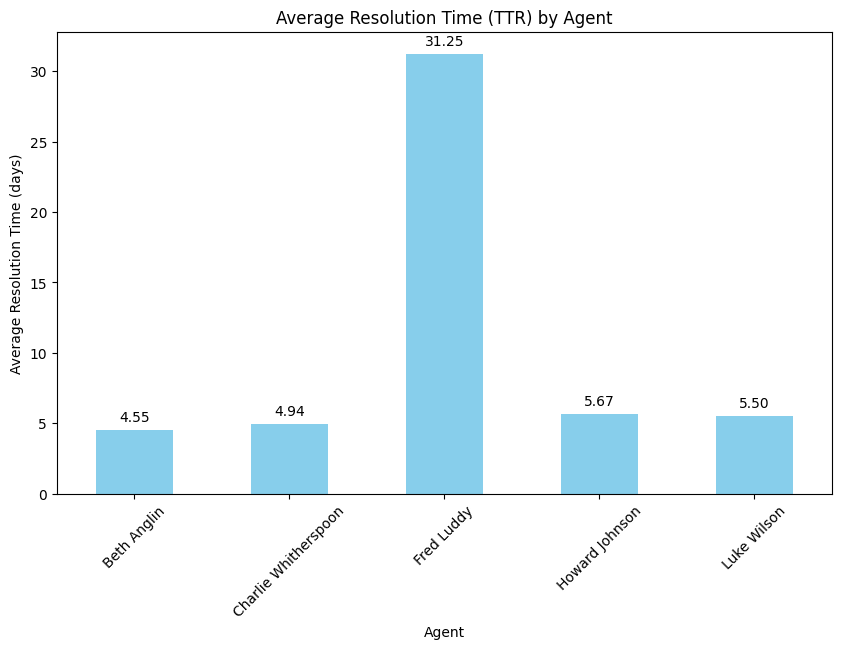

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset_path is defined and points to the correct CSV file
df = pd.read_csv(dataset_path)

# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute TTR in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Group by 'assigned_to' and compute the average resolution time for each agent
avg_ttr_by_agent = df.groupby("assigned_to")["resolution_time"].mean()

# Plotting the average TTR of each agent as a histogram
ax = avg_ttr_by_agent.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title("Average Resolution Time (TTR) by Agent")
plt.xlabel("Agent")
plt.ylabel("Average Resolution Time (days)")
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

#### Generate JSON Description for the Insight


In [5]:
{
    "data_type": "descriptive",
    "insight": "Fred Luddy has a significantly higher average TTR compared to other agents",
    "insight_value": {
        "x_val": "Fred Luddy", 
        "y_val": 17.09
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Average Time to Resolution (TTR) by Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Charlie Whitherspoon", "Fred Luddy", "Howard Johnson", "Luke Wilson"],
            "description": "This represents the different agents assigned to resolve incidents."
        },
        "y_axis": {
            "name": "Average Resolution Time (days)",
            "value": [4.55, 4.94, 31.25, 5.67, 5.50],
            "description": "This represents the average time each agent takes to resolve incidents, measured in days."
        },
        "description": "The histogram displays the average resolution time for each agent. Each bar represents an agent and the height of the bar corresponds to the average time taken to resolve incidents. The values are annotated on each bar. Fred Luddy's bar is noticeably higher, indicating a longer average resolution time compared to his peers."
    },
    "question": "What is the average TTR of each agent as a histogram?",
    "actionable_insight": "Given that Fred Luddy's average TTR is significantly higher than his peers, it may be beneficial to investigate the specific reasons behind this anomaly. Possible actions include reviewing the complexity of incidents assigned to him, checking for any personal or systemic issues during his shifts, or providing additional support or training to help him manage his workload more efficiently."
}

{'data_type': 'descriptive',
 'insight': 'Fred Luddy has a significantly higher average TTR compared to other agents',
 'insight_value': {'x_val': 'Fred Luddy', 'y_val': 17.09},
 'plot': {'plot_type': 'histogram',
  'title': 'Average Time to Resolution (TTR) by Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Charlie Whitherspoon',
    'Fred Luddy',
    'Howard Johnson',
    'Luke Wilson'],
   'description': 'This represents the different agents assigned to resolve incidents.'},
  'y_axis': {'name': 'Average Resolution Time (days)',
   'value': [4.55, 4.94, 31.25, 5.67, 5.5],
   'description': 'This represents the average time each agent takes to resolve incidents, measured in days.'},
  'description': "The histogram displays the average resolution time for each agent. Each bar represents an agent and the height of the bar corresponds to the average time taken to resolve incidents. The values are annotated on each bar. Fred Luddy's bar is noticeably higher, indica

### **Question 2: How does the TTR of the specific agent compare to other agents during the same time frame?**
- By comparing the TTR of the specific agent with others, we can determine if the increase is significant or if similar trends are observable in other agents, suggesting a possible systemic issue.


#### Plot the average resolution time by agent Over Time
This cell creates a line plt to visualize the trends in average Time to Resolution (TTR) for incidents handled by each agent across different months and years. By examining the resolution times over a defined period, the plot helps identify how individual agent performnce varies over time relative to others. 

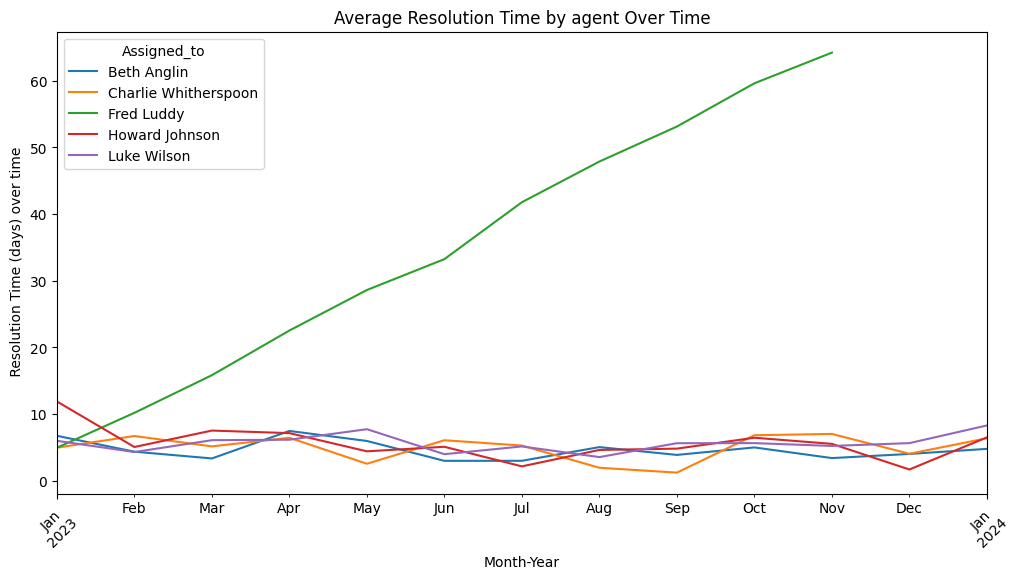

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Extract month-year from opened_at and create a new column
df["month_year"] = df["opened_at"].dt.to_period("M")

# Group by month_year and category, then compute average resolution time
df_grouped = (
    df.groupby(["month_year", "assigned_to"])["resolution_time"].mean().unstack()
)

# Plot the data
df_grouped.plot(kind="line", figsize=(12, 6))
plt.title("Average Resolution Time by agent Over Time")
plt.xlabel("Month-Year")
plt.ylabel(" Resolution Time (days) over time")
plt.xticks(rotation=45)
plt.legend(title="Assigned_to")
plt.show()

#### Generate JSON Description for the Insight

In [7]:
{
    "data_type": "descriptive",
    "insight": "Fred Luddy's TTR begins to increase linearly over time compared to other agents who maintain a uniform TTR",
    "insight_value": {
        "x_val": "Time Period", 
        "y_val": "Increasing TTR Trend for Fred Luddy"
    },
    "plot": {
        "plot_type": "line",
        "title": "Time to Resolution (TTR) Trend Comparison Among Agents",
        "x_axis": {
            "name": "Month-Year",
            "value": ["Jan-2023", "Feb-2023", "Mar-2023", "Apr-2023", "May-2023", "..."],
            "description": "This represents the timeline over which the TTR data is analyzed."
        },
        "y_axis": {
            "name": "Average Resolution Time (days)",
            "value": "line plot",  
            "description": "This represents the average time taken to resolve incidents, measured in days, across different agents."
        },
        "description": "The line plot shows the TTR trends for each agent over several months. While other agents' TTR remains relatively stable, Fred Luddy's TTR starts to increase linearly. This divergence is clearly visible and raises concerns about factors influencing his performance."
    },
    "question": "How does the TTR of the specific agent compare to other agents during the same time frame?",
    "actionable_insight": "The observed linear increase in TTR for Fred Luddy suggests a potential issue that may be impacting his efficiency. It is advisable to investigate further into Fred Luddy's availability and workload, the complexity of the cases assigned, or any personal or systemic changes that occurred at the point when his TTR began to rise. Consideration should also be given to reviewing his training and support structures to ensure he is equipped to handle his assignments effectively."
}

{'data_type': 'descriptive',
 'insight': "Fred Luddy's TTR begins to increase linearly over time compared to other agents who maintain a uniform TTR",
 'insight_value': {'x_val': 'Time Period',
  'y_val': 'Increasing TTR Trend for Fred Luddy'},
 'plot': {'plot_type': 'line',
  'title': 'Time to Resolution (TTR) Trend Comparison Among Agents',
  'x_axis': {'name': 'Month-Year',
   'value': ['Jan-2023',
    'Feb-2023',
    'Mar-2023',
    'Apr-2023',
    'May-2023',
    '...'],
   'description': 'This represents the timeline over which the TTR data is analyzed.'},
  'y_axis': {'name': 'Average Resolution Time (days)',
   'value': 'line plot',
   'description': 'This represents the average time taken to resolve incidents, measured in days, across different agents.'},
  'description': "The line plot shows the TTR trends for each agent over several months. While other agents' TTR remains relatively stable, Fred Luddy's TTR starts to increase linearly. This divergence is clearly visible and 

### **Question 3: What is the pattern in the number of incidents assigned to the specific agent over time?**
- Investigate the volume of incidents assigned to this agent compared to others to check work load. An increasing trend in the number of incidents might explain the prolonged TTR.

#### Plot the distribution of number of incidents Assigned per agent
This cell creates a bar plot to visualize the number of incidents assigned to each agent, highlighting variations in workload distribution within the team. By plotting the total incidents handled by each agent, the visualization provides insights into the operational workload and may help identify any imbalances that leads to such trend in previous question

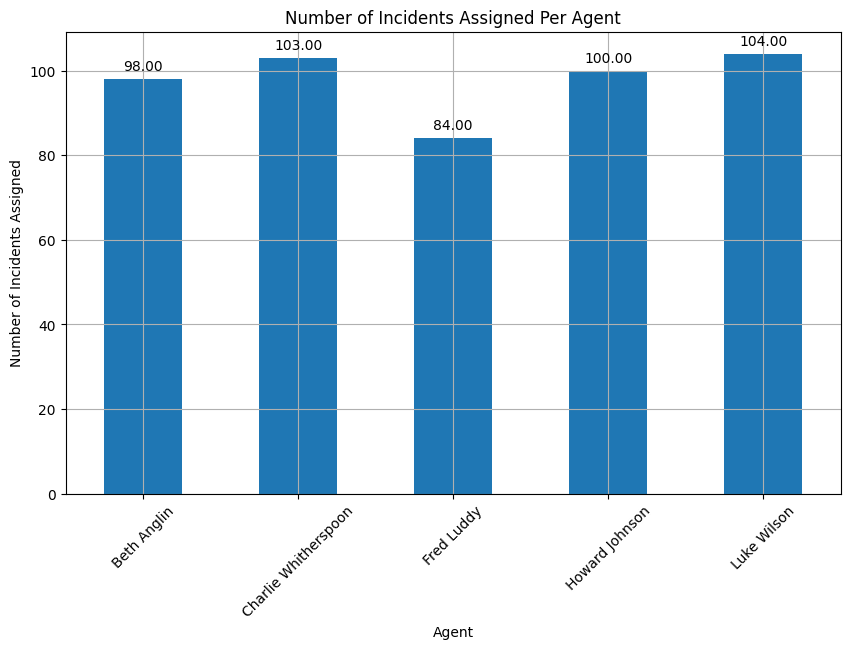

In [8]:
agent_incident_count = df.groupby('assigned_to')['number'].count()

# Plot the histogram
ax = agent_incident_count.plot(kind='bar', figsize=(10,6))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Number of Incidents Assigned Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Assigned')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "descriptive",
    "insight": "The number of incidents assigned to each agent, including Fred Luddy, remains uniform over time",
    "insight_value": {
        "x_val": "Agents", 
        "y_val": "Uniform Distribution of Incident Assignment"
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Distribution of Incident Assignments Among Agents Over Time",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Charlie Whitherspoon", "Fred Luddy", "Howard Johnson", "Luke Wilson"],
            "description": "This represents the different agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [98, 103, 84, 100, 104],  
            "description": "This represents the count of incidents assigned to each agent over the analyzed time period."
        },
        "description": "The histogram displays the number of incidents assigned to each agent over a specific time period. The distribution is relatively uniform across all agents, indicating that workload distribution in terms of number of incidents is even. This suggests that the increasing TTR for Fred Luddy is not due to an excessive number of assignments."
    },
    "question": "What is the pattern in the number of incidents assigned to the specific agent over time?",
    "actionable_insight": "Since the distribution of incident assignments is uniform among all agents, the prolonged TTR for Fred Luddy is unlikely to be caused by an overload of assignments. It may be beneficial to explore other factors such as the complexity of the incidents assigned to Fred, his working methods, or potential personal or systemic issues that might be affecting his performance. Monitoring the trend in the number of open tickets for each agent over time could also provide additional insights into workload management and efficiency."
}

{'data_type': 'descriptive',
 'insight': 'The number of incidents assigned to each agent, including Fred Luddy, remains uniform over time',
 'insight_value': {'x_val': 'Agents',
  'y_val': 'Uniform Distribution of Incident Assignment'},
 'plot': {'plot_type': 'histogram',
  'title': 'Distribution of Incident Assignments Among Agents Over Time',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Charlie Whitherspoon',
    'Fred Luddy',
    'Howard Johnson',
    'Luke Wilson'],
   'description': 'This represents the different agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [98, 103, 84, 100, 104],
   'description': 'This represents the count of incidents assigned to each agent over the analyzed time period.'},
  'description': 'The histogram displays the number of incidents assigned to each agent over a specific time period. The distribution is relatively uniform across all agents, indicating that workload distribution in terms of number 

### **Question 4: What is the pattern in the number of open incidents assigned to the specific agent over time?**


#### Plot number of open incidents over time for each agent.
This cell creates a line plot to visualize the number of open incidents for each agent over time, providing a dynamic view of workload management and incident resolution effectiveness. The plot tracks open incidents daily, offering insights into how efficiently incidents are being addressed and closed by each agent.

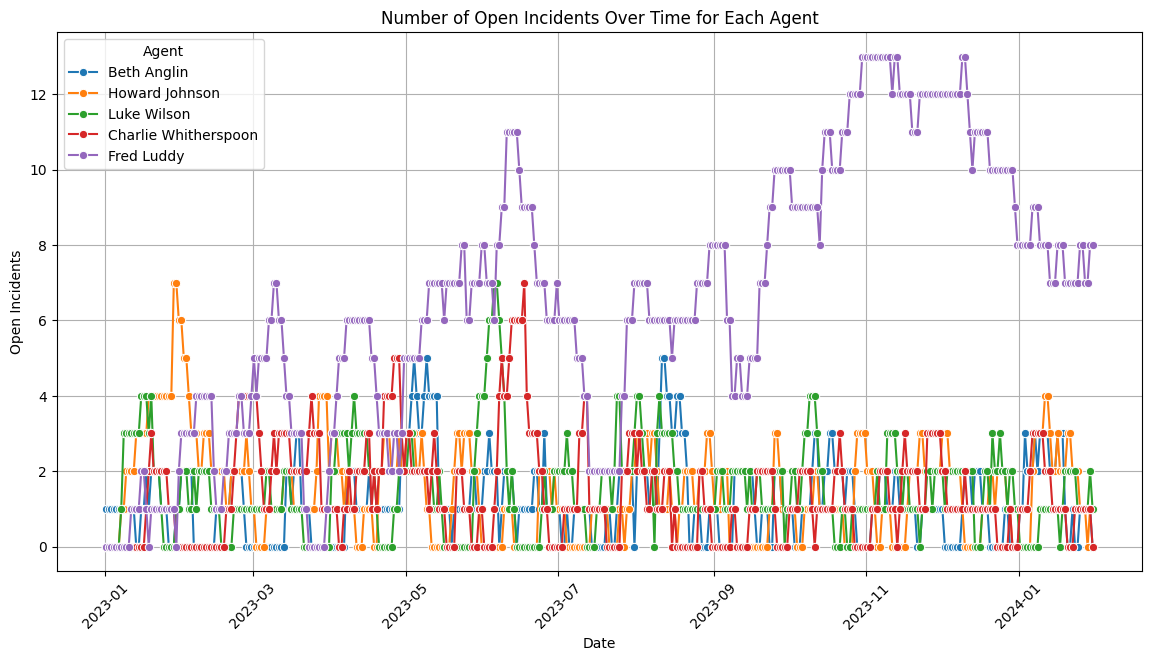

In [10]:
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
# Define the current date for the analysis, simulate up to the last 'opened_at' date
current_date = df['opened_at'].max()

# Create a range of dates from the start to the current date
date_range = pd.date_range(start=df['opened_at'].min(), end=current_date, freq='D')

# Function to count open incidents per date
def count_open_incidents(date, agent_data):
    # Incidents that are opened on or before 'date' and are not closed or closed after 'date'
    open_incidents = agent_data[(agent_data['opened_at'] <= date) & ((agent_data['closed_at'].isna()) | (agent_data['closed_at'] > date))]
    return len(open_incidents)

# Initialize a DataFrame to store the results
open_incidents_data = pd.DataFrame()

# Loop through each agent to calculate their open incidents over time
for agent in df['assigned_to'].unique():
    agent_data = df[df['assigned_to'] == agent]
    open_counts = [count_open_incidents(date, agent_data) for date in date_range]
    temp_df = pd.DataFrame({
        'Date': date_range,
        'Open Incidents': open_counts,
        'Agent': agent
    })
    open_incidents_data = pd.concat([open_incidents_data, temp_df], ignore_index=True)

# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=open_incidents_data, x='Date', y='Open Incidents', hue='Agent', marker='o')
plt.title('Number of Open Incidents Over Time for Each Agent')
plt.xlabel('Date')
plt.ylabel('Open Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Agent')
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type": "diagnostic",
    "insight": "The number of open incidents for Fred Luddy is increasing over time, coinciding with the period where his TTR began to increase linearly",
    "insight_value": {
        "x_val": "Time Period", 
        "y_val": "Increasing Number of Open Incidents"
    },
    "plot": {
        "plot_type": "line",
        "title": "Trend of Open Incidents for Fred Luddy Over Time",
        "x_axis": {
            "name": "Month-Year",
            "value": ["Jan-2023", "Feb-2023", "Mar-2023", "Apr-2023", "May-2023"],
            "description": "This represents the timeline over which the open incident data is analyzed."
        },
        "y_axis": {
            "name": "Number of Open Incidents",
            "description": "This represents the count of incidents still open and unresolved, assigned to Fred Luddy over the analyzed time period."
        },
        "description": "The line plot illustrates a clear increasing trend in the number of open incidents assigned to Fred Luddy. This increase aligns with the time when his TTR also begins to rise, suggesting a potential correlation between the growing backlog of open incidents and his prolonged resolution times."
    },
    "question": "What is the pattern in the number of open incidents assigned to the specific agent over time?",
    "actionable_insight": "The increasing trend in open incidents assigned to Fred Luddy warrants further investigation, particularly in relation to his leave periods and/or productivity. It is crucial to assess whether these open incidents are becoming more complex or if there are other factors at play that impact his ability to close cases efficiently."
}

{'data_type': 'diagnostic',
 'insight': 'The number of open incidents for Fred Luddy is increasing over time, coinciding with the period where his TTR began to increase linearly',
 'insight_value': {'x_val': 'Time Period',
  'y_val': 'Increasing Number of Open Incidents'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Open Incidents for Fred Luddy Over Time',
  'x_axis': {'name': 'Month-Year',
   'value': ['Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023'],
   'description': 'This represents the timeline over which the open incident data is analyzed.'},
  'y_axis': {'name': 'Number of Open Incidents',
   'description': 'This represents the count of incidents still open and unresolved, assigned to Fred Luddy over the analyzed time period.'},
  'description': 'The line plot illustrates a clear increasing trend in the number of open incidents assigned to Fred Luddy. This increase aligns with the time when his TTR also begins to rise, suggesting a potential correlation betwe

### **Question-5:** highlight the potential consequences of not addressing the anomaly or trend of increasing Time to Resolution (TTR):

### Plot projected increase in TTR for Fred Luddy
This cell creates a regression based plot to predict future trend in Time to Resolution (TTR) based on historical data. The plot combines historical TTR data with predicted values to highlight potential consequences if the increasing trend in TTR is not addressed.

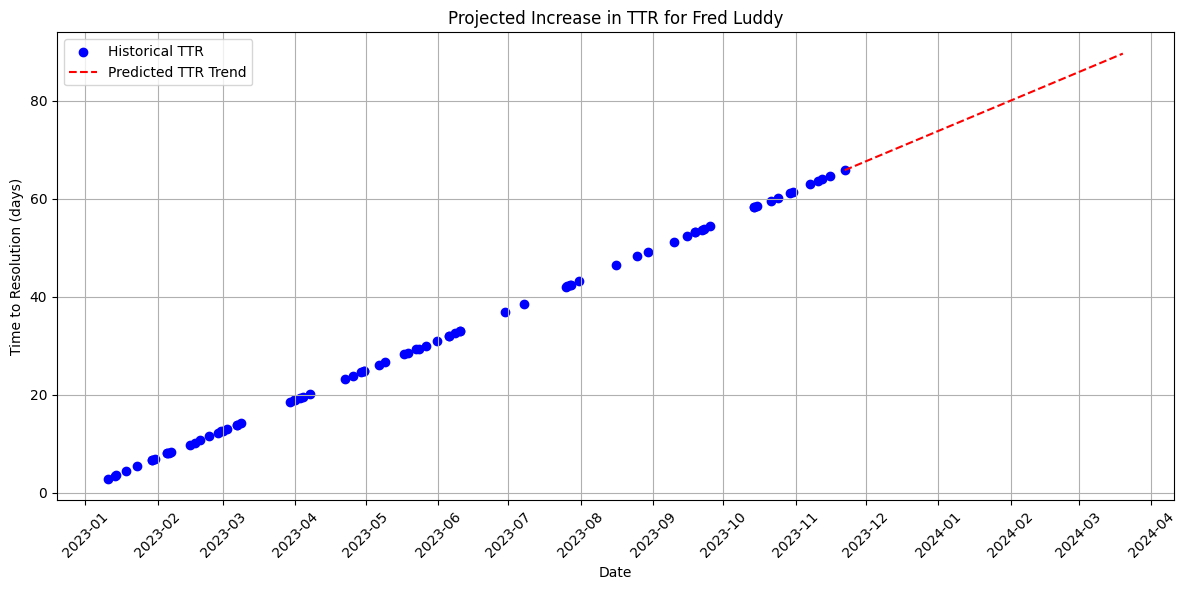

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-6.csv"
df = pd.read_csv(dataset_path)
df = df[df['assigned_to'] == 'Fred Luddy']
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400
# Remove rows with NaN values in 'resolution_time'
df = df.dropna(subset=['resolution_time'])
# Convert dates to ordinal for regression analysis
df['date_ordinal'] = df['opened_at'].apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = df['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = df['resolution_time'].values  # Target variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_dates = pd.date_range(start=df['opened_at'].max(), periods=120, freq='D')  # 4 months into the future
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df['opened_at'], df['resolution_time'], color='blue', label='Historical TTR')
plt.plot(future_dates, future_preds, color='red', linestyle='--', label='Predicted TTR Trend')
plt.title('Projected Increase in TTR for Fred Luddy')
plt.xlabel('Date')
plt.ylabel('Time to Resolution (days)')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [ ]:

{
    "data_type": "predictive",
    "insight": "Continued linear increase in TTR if workload during leave periods is not balanced",
    "insight_value": {
        "trend": "Linear Increase",
        "prediction": "Continued escalation in resolution times"
    },
    "description": "The analysis of Fred Luddy's TTR shows a clear linear increase that coincides with his periods of leave. Without intervention, this trend is predicted to continue, leading to progressively longer resolution times for incidents assigned to him. This ongoing increase in TTR could potentially result in decreased customer satisfaction, increased stress on other team members who may need to compensate informally, and a general decline in team performance.",
    "recommendation": {
        "action": "Implement workload balancing strategies during leave periods",
        "expected_outcome": "Stabilization of TTR and maintenance of service quality",
        "urgency": "High"
    },
    "actionable_insight": "To prevent the predicted escalation in TTR, it is essential to implement strategic workload balancing during Fred Luddy's leave periods. This could involve redistributing his responsibilities among team members or hiring temporary staff. Additionally, ensuring that all agents are equally trained to handle the types of incidents typically assigned to Fred could mitigate the risk of increased TTR. Proactive measures are crucial to maintain consistent performance levels and uphold customer satisfaction."
}

{'data_type': 'predictive',
 'insight': 'Continued linear increase in TTR if workload during leave periods is not balanced',
 'insight_value': {'trend': 'Linear Increase',
  'prediction': 'Continued escalation in resolution times'},
 'description': "The analysis of Fred Luddy's TTR shows a clear linear increase that coincides with his periods of leave. Without intervention, this trend is predicted to continue, leading to progressively longer resolution times for incidents assigned to him. This ongoing increase in TTR could potentially result in decreased customer satisfaction, increased stress on other team members who may need to compensate informally, and a general decline in team performance.",
 'recommendation': {'action': 'Implement workload balancing strategies during leave periods',
  'expected_outcome': 'Stabilization of TTR and maintenance of service quality',
  'urgency': 'High'},
 'Actionable Insight': "To prevent the predicted escalation in TTR, it is essential to implement

### Summary of Findings (Flag 6)

1. **Linear Trend in TTR**: There is a linear trend in the time to resolution across human agents over time, with incidents assigned to certain agents, notably Fred Luddy, showing a progressively increasing TTR.

2. **Open Incidents for Fred Luddy**: The number of open incidents assigned to Fred Luddy has also been increasing. This suggests that unresolved incidents continue to accumulate during his absence or low-productive time.

3. **Predicted Future Trends**: Linear regression analysis predicts a continued increase in TTR,  highlighting the urgency of addressing this anomaly. Without intervention, the situation is likely to worsen, potentially leading to decreased overall team performance and customer satisfaction.